## GRIP TASK 6 
### Prediction using Decision Tree
TANIYA SHARMA

In [30]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
import pydotplus 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
iris=datasets.load_iris()
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y=iris.target
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
x.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [34]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
clf=DecisionTreeClassifier().fit(x_train,y_train)

In [36]:
y_predict=clf.predict(x_test)
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df1.head(20)

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9536585365853658

[Text(1562.4, 2201.58, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(1171.8000000000002, 1712.34, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(1953.0, 1712.34, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(781.2, 1223.1, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(390.6, 733.8599999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(1171.8000000000002, 733.8599999999999, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(781.2, 244.6199999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(1562.4, 244.6199999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(3124.8, 1223.1, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass =

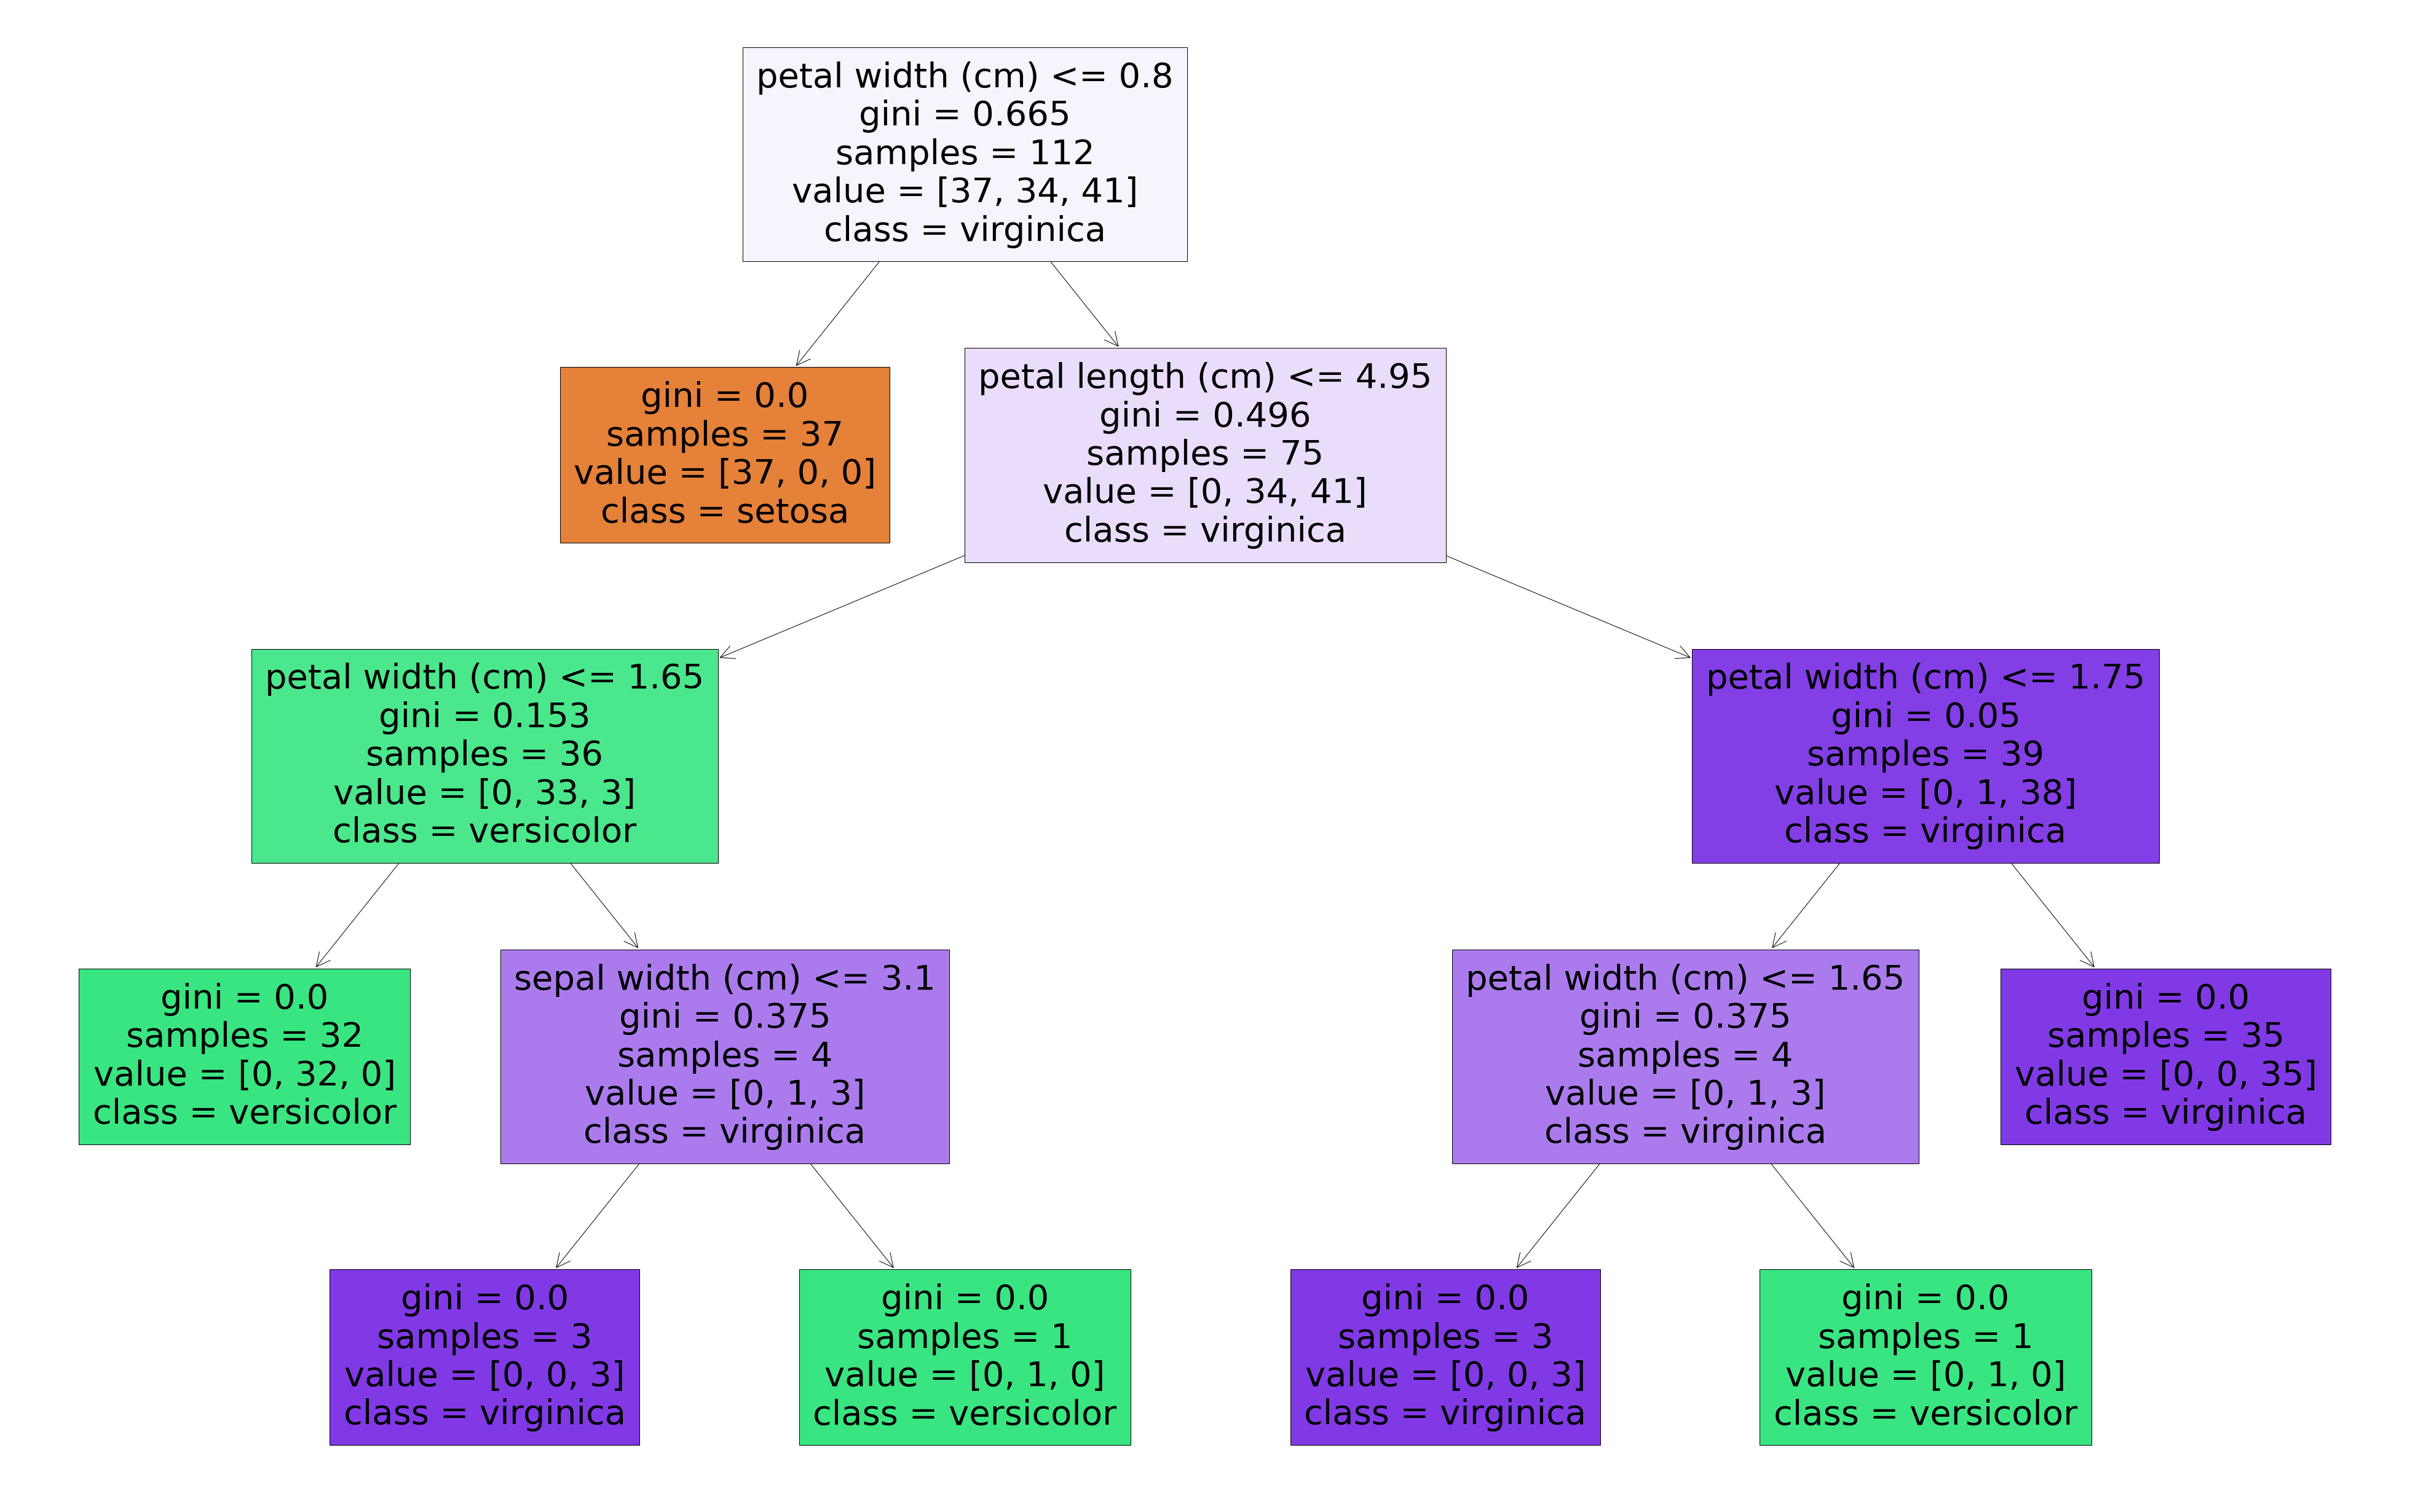

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)